# Suicide rates
(data from https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016)

Columns: 
- country
- year (1987 - 2016, with missing years)
- sex (male, female)
- age (6 groups, (5,14), (15,24), (25,34), (35,54), (55,74), (75, ...))
- suicides_no
- population
- suicides/100k pop
- country-year
- HDI for year
- gdp_for_year (US dollars)
- gdp_per_capita (US dollars)
- generation ('Generation X', 'Silent', 'G.I. Generation', 'Boomers', 'Millenials', 'Generation Z')

***

## Questions:
- Which country does have the biggest number of suicides?
- Which age group, sex, and generation is more likely to commit a suicide?

In [42]:
import pandas as pd
%matplotlib inline

In [2]:
sr = pd.read_csv('master.csv', header=0)

### Exploring the data

In [3]:
sr.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [ ]:
sr.info()

In [ ]:
sr.describe()

In [ ]:
sr['generation'].unique()

In [ ]:
sr.isnull().sum()

## Data cleaning

In [4]:
sr.rename(index=str, columns={'suicides/100k pop': 'suicides_100k', 'population': 'age_group_pop', 'gdp_per_capita ($)' : 'gdp_capita', ' gdp_for_year ($) ' : 'gdp_year'}, inplace=True)

In [5]:
sr.replace(',', '', regex=True, inplace=True)
sr.replace('years', '', regex=True, inplace=True)

In [6]:
sr.replace('female', 1, regex=True, inplace=True)
sr.replace('male', 0, regex=True, inplace=True)

### Deleting unnecessary columns

In [7]:
sr.drop(['HDI for year','country-year'], axis=1, inplace=True)

In [8]:
sr.head()

,country,year,sex,age,suicides_no,age_group_pop,suicides_100k,gdp_year,gdp_capita,generation
0,Albania,1987,0,15-24,21,312900,6.71,2156624900,796,Generation X
1,Albania,1987,0,35-54,16,308000,5.19,2156624900,796,Silent
2,Albania,1987,1,15-24,14,289700,4.83,2156624900,796,Generation X
3,Albania,1987,0,75+,1,21800,4.59,2156624900,796,G.I. Generation
4,Albania,1987,0,25-34,9,274300,3.28,2156624900,796,Boomers


In [41]:
sr.corr()

,year,sex,suicides_no,age_group_pop,suicides_100k,gdp_capita
year,1.000000,0.000000e+00,-0.004546,0.008850,-0.039037,3.391343e-01
sex,0.000000,1.000000e+00,-0.144629,0.011242,-0.391496,-1.336263e-18
suicides_no,-0.004546,-1.446292e-01,1.000000,0.616162,0.306604,6.132975e-02
age_group_pop,0.008850,1.124208e-02,0.616162,1.000000,0.008285,8.150986e-02
suicides_100k,-0.039037,-3.914965e-01,0.306604,0.008285,1.000000,1.785134e-03
gdp_capita,0.339134,-1.336263e-18,0.061330,0.081510,0.001785,1.000000e+00


## Grouping the data

### Country

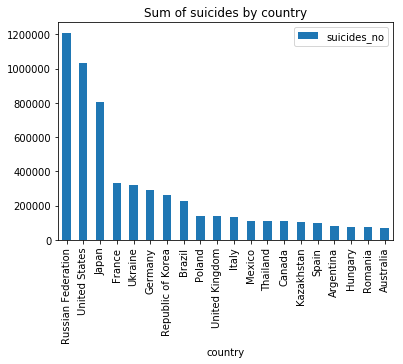

In [78]:
# by sum
sr.groupby('country').sum().sort_values(by='suicides_no', ascending=False).head(20).plot(y='suicides_no', kind='bar', title='Sum of suicides by country');

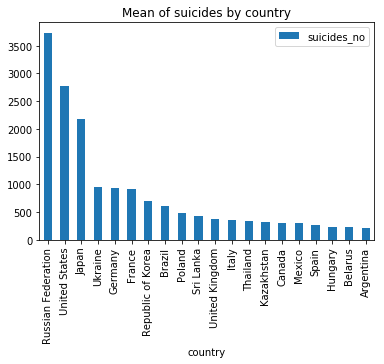

In [80]:
# by mean of each country
sr.groupby('country').mean().sort_values(by='suicides_no', ascending=False).head(20).plot(y='suicides_no', kind='bar', title='Mean of suicides by country');

### Year

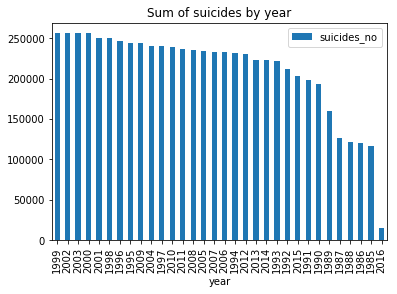

In [81]:
# by sum of each year
sr.groupby('year').sum().sort_values(by='suicides_no', ascending=False).plot(kind='bar', y='suicides_no', title='Sum of suicides by year');

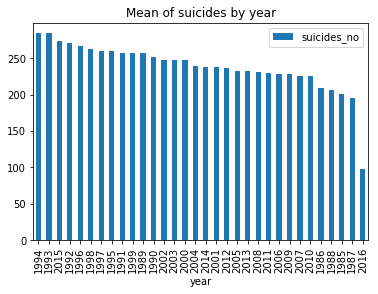

In [82]:
# by mean of each year
sr.groupby('year').mean().sort_values(by='suicides_no', ascending=False).plot(kind='bar', y='suicides_no', title='Mean of suicides by year');

### Country and year

In [73]:
# by sum of country and year
sr.groupby(['country','year']).sum().sort_values(by='suicides_no', ascending=False)#.unstack().plot(y='suicides_no', kind='bar',figsize=(30,30))

sex  suicides_no  age_group_pop  \
country                      year                                    
Russian Federation           1994    6        61420      138476200   
                             1995    6        60548      139087100   
                             1996    6        57511      139272600   
                             1999    6        56974      138717800   
                             2001    6        56958      137521509   
                             2000    6        56619      138205695   
                             1993    6        55846      137692800   
                             2002    6        55024      136590900   
                             1997    6        54746      139283200   
                             1998    6        51518      139122100   
                             2003    6        51445      137019868   
                             2004    6        49096      137071699   
                             1992    6        45923      138118900   
                             2005    6        45802      136162191   
United States                2015    6        44189      300078511   
                             2014    6        42769      297749735   
Russian Federation           2006    6        42614      135357462   
                             2007    6        41149      134778964   
United States                2013    6        41143      295322862   
                             2012    6        40596      292827128   
                             2011    6        39508      290313825   
Russian Federation           1991    6        39281      137283000   
                             1990    6        39028      136398200   
United States                2010    6        38362      287839149   
Russian Federation           2008    6        38211      134385949   
                             1989    6        37921      135443800   
                             2009    6        37408      134085433   
United States                2009    6        36900      285162662   
                             2008    6        36030      282355565   
                             2007    6        34596      280658606   
...                                ...          ...            ...   
Antigua and Barbuda          2013    6            0          89779   
                             2014    6            0          90837   
Montenegro                   2001    6            0         578668   
                             2000    6            0         578668   
Grenada                      2015    6            0          96892   
                             2016    5            0          79012   
Antigua and Barbuda          1991    6            0          60394   
                             1989    6            0          59238   
                             1988    6            0          59564   
                             1987    6            0          60261   
Grenada                      2009    6            0          94746   
Slovakia                     2006    6            0        5129369   
                             2007    6            0        5132660   
Bahrain                      1997    6            0         529754   
Grenada                      2010    6            0          94980   
Barbados                     2002    6            0         253353   
                             2003    6            0         254122   
                             2007    6            0         258083   
Grenada                      2013    6            0          95876   
                             2014    6            0          96393   
Barbados                     2011    6            0         263203   
Albania                      2005    6            0        2783320   
                             2006    6            0        2780176   
Barbados                     2012    6            0         264270   
                             2013    6       

### Age

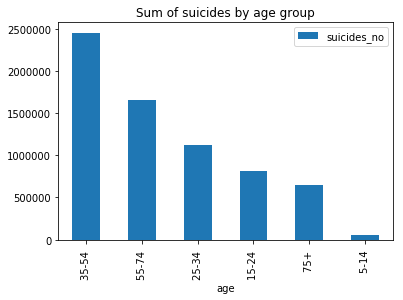

In [86]:
# by age group mean
sr.groupby('age').sum().sort_values(by='suicides_no', ascending=False).plot(kind='bar', y='suicides_no', title='Sum of suicides by age group');

### Generation and age

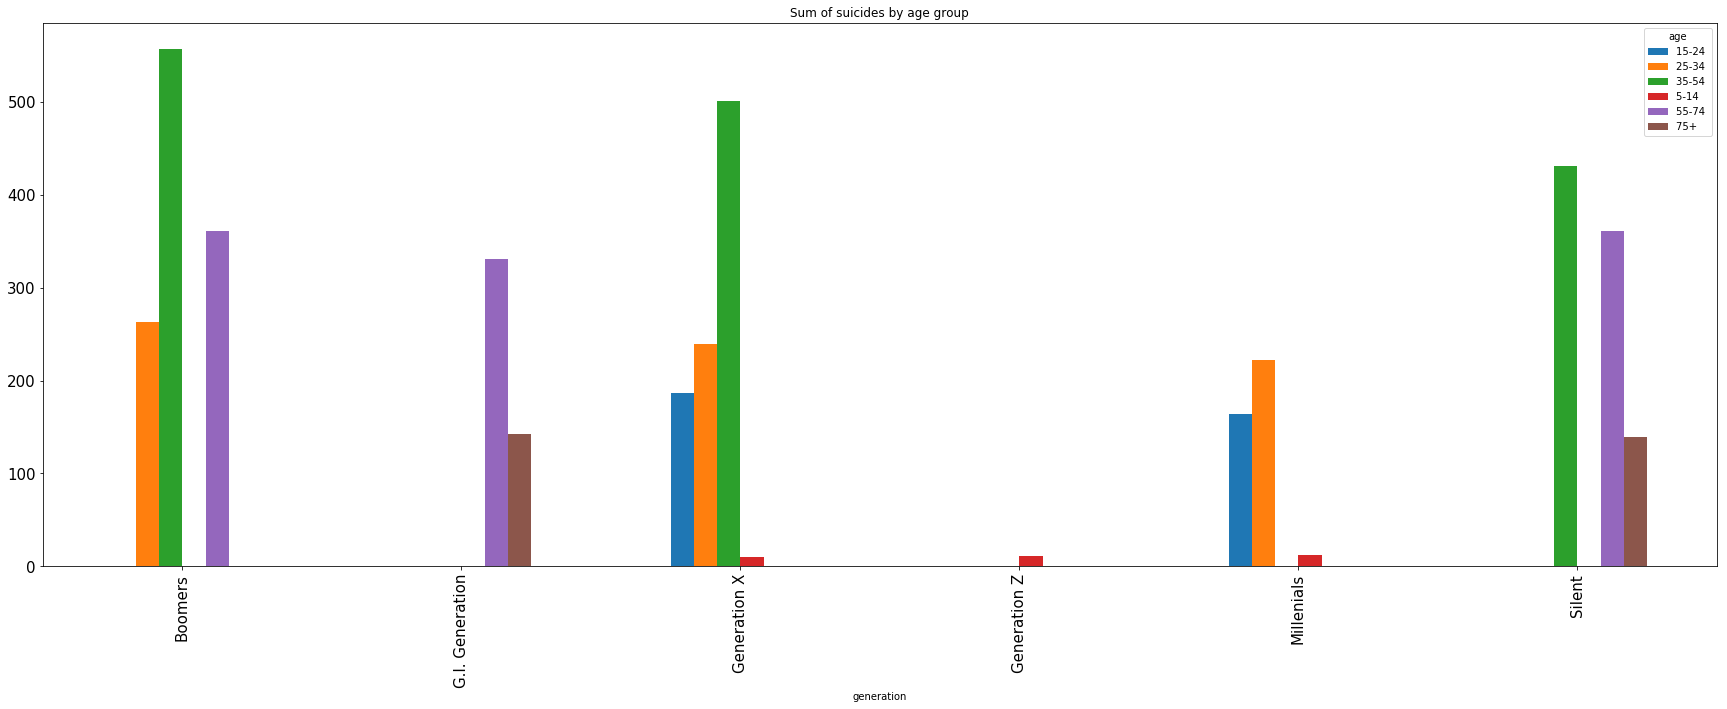

In [92]:
# by generation and age group mean
sr.groupby(['generation', 'age']).mean().sort_values(by='suicides_no', ascending=False).unstack().plot(kind='bar', y='suicides_no', title='Sum of suicides by age group', figsize=(30,10), fontsize=15);